In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.utils import image_dataset_from_directory

In [55]:
train_ds = image_dataset_from_directory(
    "../data/human-and-non-human/training_set/training_set",
    validation_split=0.3,
    subset="training",
    seed=123,
    image_size=(250,250),
    batch_size=32,
    labels="inferred",
)
train_ds

Found 8017 files belonging to 2 classes.
Using 5612 files for training.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [54]:
val_ds = image_dataset_from_directory(
 "../data/human-and-non-human/training_set/training_set",
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(250,250),
  batch_size=32,
  labels="inferred",
)
val_ds

Found 8017 files belonging to 2 classes.
Using 2405 files for validation.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [9]:
from keras import Sequential
from keras import layers
from keras.layers import Rescaling

In [56]:

from keras import layers, models

# Load pretrained MobileNetV2
base_model = keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(250, 250, 3))

# Freeze the base model (not trainable)
base_model.trainable = False

# Add custom layers on top for your specific task
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # For binary classification: human (1) vs not human (0)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Now, you can fine-tune it or train on your human vs not-human dataset
model.fit(train_ds, epochs=5, validation_data=val_ds)


C:\Users\HP\AppData\Local\Temp\ipykernel_13808\540324685.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(250, 250, 3))


Epoch 1/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 134s 741ms/step - accuracy: 0.8858 - loss: 0.2568 - val_accuracy: 0.9609 - val_loss: 0.1045
Epoch 2/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 137s 782ms/step - accuracy: 0.9701 - loss: 0.0805 - val_accuracy: 0.9696 - val_loss: 0.0745
Epoch 3/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 146s 830ms/step - accuracy: 0.9844 - loss: 0.0482 - val_accuracy: 0.9613 - val_loss: 0.0927
Epoch 4/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 119s 676ms/step - accuracy: 0.9880 - loss: 0.0369 - val_accuracy: 0.9742 - val_loss: 0.0671
Epoch 5/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 78s 441ms/step - accuracy: 0.9916 - loss: 0.0291 - val_accuracy: 0.9825 - val_loss: 0.0495


In [59]:

test_training_ds = image_dataset_from_directory(
  "../data/human-and-non-human/test_set/test_set",
  seed=123,
  image_size=(250,250),
  batch_size=32,
  labels="inferred",

)
test_training_ds

Found 2723 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [60]:
model.evaluate(test_training_ds)

86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 308ms/step - accuracy: 0.9737 - loss: 0.0705


[0.06365882605314255, 0.977230966091156]

In [61]:
train_ds.class_names

['humans', 'non-humans']

In [71]:
import cv2 as cv
import numpy as np

# Load grayscale image
image = cv.imread("../data/human-and-non-human/sarbesh.jpg")

# Resize and normalize
resized_image = cv.resize(image, (250, 250))
resized_image = np.array(resized_image)

resized_image = np.expand_dims(resized_image , axis=0)

# Now this will work
prediction = model.predict(resized_image)
if prediction>0.5:
    print("human")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
human


In [68]:
model.predict(resized_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[0.97927094]], dtype=float32)

In [73]:
import joblib
joblib.dump(model,"human_recog_model.joblib")

['human_recog_model.joblib']

In [35]:
import pandas as pd
import random


hospital_names = [
    "Amri Hospital", "City Hospital", "Medilane Hospital",
    "Care Hospital", "Sunrise Hospital", "LifeCare Hospital",
    "Apollo Hospital", "Healing Touch Clinic", "Global Health Centre",
    "Green Cross Hospital"
]


blood_groups = ["A+", "A-", "B+", "B-", "O+", "O-", "AB+", "AB-"]


urgency_levels = ["Regular Need", "URGENT"]


data = []
for _ in range(200):
    hospital = random.choice(hospital_names)
    blood_group = random.choice(blood_groups)
    urgency = random.choice(urgency_levels)
    units_needed = random.randint(1, 10)
    
    data.append([hospital, blood_group, urgency, units_needed])

df = pd.DataFrame(data, columns=["Hospital Name", "Blood Group", "Urgency", "Units Needed"])

print("Original Data:")
print(df.head())


df["Hospital Name Encoded"] = df["Hospital Name"].astype('category').cat.codes

df["Blood Group Encoded"] = df["Blood Group"].astype('category').cat.codes


df["Urgency Encoded"] = df["Urgency"].map({"Regular Need": 0, "URGENT": 1})

preprocessed_df = df[[
    "Hospital Name Encoded", "Blood Group Encoded", "Urgency Encoded", "Units Needed"
]]

print("\nPreprocessed Data (Encoded):")
print(preprocessed_df.head())

df['Shortage'] = df.apply(
    lambda row: 1 if (row['Urgency'] == "URGENT" and row['Units Needed'] > 5) else 0, 
    axis=1
)

print(df[['Blood Group', 'Urgency', 'Units Needed', 'Shortage']].head())
df


Original Data:
          Hospital Name Blood Group       Urgency  Units Needed
0       Apollo Hospital          O+        URGENT             5
1  Global Health Centre          B-  Regular Need             5
2       Apollo Hospital          O+        URGENT             6
3  Global Health Centre          O+        URGENT             9
4       Apollo Hospital          B-  Regular Need             3

Preprocessed Data (Encoded):
   Hospital Name Encoded  Blood Group Encoded  Urgency Encoded  Units Needed
0                      1                    6                1             5
1                      4                    5                0             5
2                      1                    6                1             6
3                      4                    6                1             9
4                      1                    5                0             3
  Blood Group       Urgency  Units Needed  Shortage
0          O+        URGENT             5         0
1    

,Hospital Name,Blood Group,Urgency,Units Needed,Hospital Name Encoded,Blood Group Encoded,Urgency Encoded,Shortage
0,Apollo Hospital,O+,URGENT,5,1,6,1,0
1,Global Health Centre,B-,Regular Need,5,4,5,0,0
2,Apollo Hospital,O+,URGENT,6,1,6,1,1
3,Global Health Centre,O+,URGENT,9,4,6,1,1
4,Apollo Hospital,B-,Regular Need,3,1,5,0,0
...,...,...,...,...,...,...,...,...
195,Healing Touch Clinic,AB-,Regular Need,7,6,3,0,0
196,City Hospital,B-,Regular Need,9,3,5,0,0
197,LifeCare Hospital,AB-,Regular Need,2,7,3,0,0
198,Amri Hospital,A-,URGENT,7,0,1,1,1


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
X = np.array(df[['Urgency Encoded' , 'Units Needed']])
y = np.array(df['Shortage'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


shortage_predict_model = RandomForestClassifier()
shortage_predict_model.fit(X_train, y_train)


print("Training accuracy:", shortage_predict_model.score(X_train, y_train))
print("Testing accuracy:", shortage_predict_model.score(X_test, y_test))


Training accuracy: 1.0
Testing accuracy: 1.0


In [31]:
import joblib
joblib.dump(shortage_predict_model , "shortage_predict_model.joblib")

['shortage_predict_model.joblib']

In [ ]:
import random
import pandas as pd

LAT_MIN, LAT_MAX = 20.2, 20.4
LON_MIN, LON_MAX = 85.7, 85.9

blood_types = ['A+', 'A-', 'B+', 'B-', 'AB+', 'AB-', 'O+', 'O-']

def generate_donor():

    latitude = random.uniform(LAT_MIN, LAT_MAX)
    longitude = random.uniform(LON_MIN, LON_MAX)
    
    donor = {
        'age': random.randint(18, 60),
        'last_donation_hours': random.randint(0, 365*24),
        'urgency': random.randint(1, 5),
        'latitude': latitude,
        'longitude': longitude,
        'blood_type': random.choice(blood_types),
    }

    if donor['last_donation_hours'] > (90 * 24) and 18 <= donor['age'] <= 55:
        label = 1  # Suitable for donation
    else:
        label = random.choices([0, 1], weights=[0.7, 0.3])[0]  # 70% probability of not suitable
    donor['label'] = label
    return donor

data = [generate_donor() for _ in range(1000)]

df = pd.DataFrame(data)

df.to_csv('../data/bbsr_donor_dataset.csv', index=False)

print("Dataset created and saved as bbsr_donor_dataset.csv")


Dataset created and saved as bbsr_donor_dataset.csv


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


donor_dataset = pd.read_csv('../data/bbsr_donor_dataset.csv')
print(df.head())

label_encoders = {}
for col in ['blood_type']:
    le = LabelEncoder()
    donor_dataset[col] = le.fit_transform(donor_dataset[col])
    label_encoders[col] = le

X = donor_dataset.drop(columns=['label'])
y = donor_dataset['label']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


donation_prob_model = LogisticRegression()
donation_prob_model.fit(X_train, y_train)


y_pred = donation_prob_model.predict(X_test)
print(classification_report(y_test, y_pred))


probabilities = donation_prob_model.predict_proba(X_test)[:, 1]  


print("First 5 donation probabilities:", probabilities[:5])


   age  last_donation_hours  urgency   latitude  longitude blood_type  label
0   50                   30        2  20.248070  85.741144        AB+      0
1   22                 6363        5  20.214108  85.811461        AB+      1
2   25                 7979        3  20.349603  85.846278         A-      1
3   47                 6140        5  20.236397  85.732100         B+      1
4   25                 3872        3  20.293023  85.889630         O-      1
              precision    recall  f1-score   support

           0       0.68      0.39      0.49        44
           1       0.85      0.95      0.89       156

    accuracy                           0.82       200
   macro avg       0.76      0.67      0.69       200
weighted avg       0.81      0.82      0.81       200

First 5 donation probabilities: [0.36747001 0.98882592 0.31532911 0.97609474 0.98832412]


In [64]:
import joblib
joblib.dump(donation_prob_model , "donation_prob_model.joblib")

['donation_prob_model.joblib']

In [65]:
donor_dataset

,age,last_donation_hours,urgency,latitude,longitude,blood_type,label
0,50,30,2,20.248070,85.741144,2,0
1,22,6363,5,20.214108,85.811461,2,1
2,25,7979,3,20.349603,85.846278,1,1
3,47,6140,5,20.236397,85.732100,4,1
4,25,3872,3,20.293023,85.889630,7,1
...,...,...,...,...,...,...,...
995,25,7719,1,20.259723,85.726493,6,1
996,55,5539,3,20.316450,85.812972,6,1
997,52,7716,3,20.300023,85.839002,1,1
998,20,3224,1,20.394726,85.860167,7,1


In [66]:
import numpy as np

probs = donation_prob_model.predict_proba(X_test)[:, 1]  


top_N = 5
top_indexes = np.argsort(probs)[-top_N:][::-1]  


print("Top", top_N, "most likely donors:")
for idx in top_indexes:
    print(f"Person {idx}: {probs[idx]*100:.2f}% chance of donating")


Top 5 most likely donors:
Person 157: 99.71% chance of donating
Person 47: 99.61% chance of donating
Person 15: 99.59% chance of donating
Person 14: 99.45% chance of donating
Person 154: 99.41% chance of donating


In [98]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler



donor_dataset = pd.read_csv('../data/bbsr_donor_dataset.csv')
print(df.head())

label_encoders = {}
for col in ['blood_type']:
    le = LabelEncoder()
    donor_dataset[col] = le.fit_transform(donor_dataset[col])
    label_encoders[col] = le

X = donor_dataset.drop(columns=['label'])
y = donor_dataset['label']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X

   age  last_donation_hours  urgency   latitude  longitude blood_type  label
0   50                   30        2  20.248070  85.741144        AB+      0
1   22                 6363        5  20.214108  85.811461        AB+      1
2   25                 7979        3  20.349603  85.846278         A-      1
3   47                 6140        5  20.236397  85.732100         B+      1
4   25                 3872        3  20.293023  85.889630         O-      1


,age,last_donation_hours,urgency,latitude,longitude,blood_type
0,50,30,2,20.248070,85.741144,2
1,22,6363,5,20.214108,85.811461,2
2,25,7979,3,20.349603,85.846278,1
3,47,6140,5,20.236397,85.732100,4
4,25,3872,3,20.293023,85.889630,7
...,...,...,...,...,...,...
995,25,7719,1,20.259723,85.726493,6
996,55,5539,3,20.316450,85.812972,6
997,52,7716,3,20.300023,85.839002,1
998,20,3224,1,20.394726,85.860167,7


In [76]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.5)
dbscan.fit(X_scaled)


DBSCAN(eps=1.5)

C:\Users\HP\AppData\Local\Temp\ipykernel_29208\456142174.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1],  cmap='viridis')


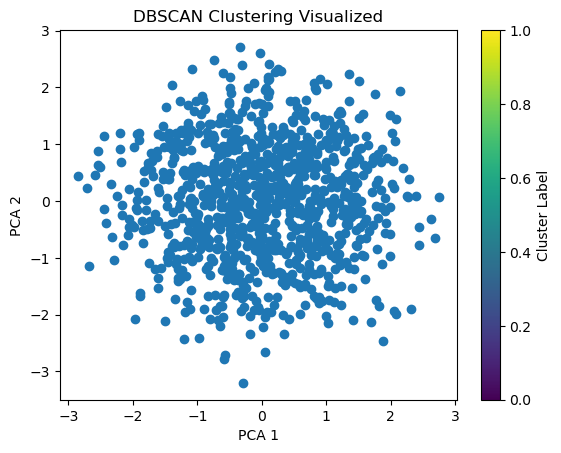

In [77]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1],  cmap='viridis')
plt.title('DBSCAN Clustering Visualized')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [83]:
import numpy as np
labels = dbscan.labels_
noise_index = np.where(labels==-1)[0]
print("anomaly behaviour: " , donor_dataset.iloc[78])
print("anomaly behaviour: " , donor_dataset.iloc[87])
print("anomaly behaviour: " , donor_dataset.iloc[262])

anomaly behaviour:  age                     24.000000
last_donation_hours    639.000000
urgency                  5.000000
latitude                20.388098
longitude               85.889015
blood_type               1.000000
label                    0.000000
Name: 78, dtype: float64
anomaly behaviour:  age                     58.000000
last_donation_hours    143.000000
urgency                  4.000000
latitude                20.326946
longitude               85.878092
blood_type               0.000000
label                    0.000000
Name: 87, dtype: float64
anomaly behaviour:  age                      49.000000
last_donation_hours    7564.000000
urgency                   5.000000
latitude                 20.231223
longitude                85.873721
blood_type                6.000000
label                     1.000000
Name: 262, dtype: float64


In [94]:
from sklearn.ensemble import IsolationForest
anomaly_predictor_model = IsolationForest(contamination=0.1)
anomaly_predictor_model.fit(X_scaled)

IsolationForest(contamination=0.1)

In [100]:
import numpy as np
anomaly_predictor_model.predict(np.array(donor_dataset.iloc[87 , 0:6]).reshape(1,6))

array([-1])

In [101]:
import joblib
joblib.dump(anomaly_predictor_model,"anomaly_predictor_model.joblib")

['anomaly_predictor_model.joblib']